In [47]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [58]:
df=pd.read_excel('Online retail.xlsx')
df

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [59]:
# Split items in each transaction
# Transform the dataset into a transaction list where each transaction is a list of items.
df = df.iloc[:, 0].str.split(',')
df

0                              [burgers, meatballs, eggs]
1                                               [chutney]
2                                       [turkey, avocado]
3       [mineral water, milk, energy bar, whole wheat ...
4                                        [low fat yogurt]
                              ...                        
7495                    [butter, light mayo, fresh bread]
7496    [burgers, frozen vegetables, eggs, french frie...
7497                                            [chicken]
7498                                [escalope, green tea]
7499    [eggs, frozen smoothie, yogurt cake, low fat y...
Name: shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil, Length: 7500, dtype: object

This transformation is a prerequisite for applying algorithms like Apriori, which require the input data in the form of transactions with individual items listed separately.

In [64]:
te = TransactionEncoder()
te_matrix = te.fit_transform(df)
# now converting te_matrix into pandas DataFrame, making it easier to work with and manipulate.
transaction_df = pd.DataFrame(te_matrix, columns=te.columns_)
transaction_df = transaction_df.astype(int)
transaction_df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# now applying the apriori algorithm
frequent_itemsets = apriori(transaction_df, min_support=0.05, use_colnames=True)
print(frequent_itemsets)

     support                    itemsets
0   0.087200                   (burgers)
1   0.081067                      (cake)
2   0.060000                   (chicken)
3   0.163867                 (chocolate)
4   0.080400                   (cookies)
5   0.051067               (cooking oil)
6   0.179733                      (eggs)
7   0.079333                  (escalope)
8   0.170933              (french fries)
9   0.063200           (frozen smoothie)
10  0.095333         (frozen vegetables)
11  0.052400             (grated cheese)
12  0.132000                 (green tea)
13  0.098267               (ground beef)
14  0.076400            (low fat yogurt)
15  0.129600                      (milk)
16  0.238267             (mineral water)
17  0.065733                 (olive oil)
18  0.095067                  (pancakes)
19  0.071333                    (shrimp)
20  0.050533                      (soup)
21  0.174133                 (spaghetti)
22  0.068400                  (tomatoes)
23  0.062533    

C:\Users\krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


1.only items that appear in at least 5% of all transactions will be considered when generating association rules. Items with a lower presence (less than 5%) will be excluded from the analysis.


2. So, 25 items in your output are fulfilling the conditions for generating association rules. These 25 items have a presence (support) that meets the minimum support threshold, meaning they appear in at least 5% of the transactions in the dataset. These items are now considered significant for identifying relationships and generating association rules based on their frequent co-occurrence in transactions.

In [67]:
frequent_itemsets = apriori(transaction_df, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules
# Lift is a measure of how much more likely the consequent is to occur when the antecedent occurs.

C:\Users\krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,0.013623,1.122506,0.309351
1,(mineral water),(chocolate),0.238267,0.163867,0.052667,0.221041,1.348907,0.013623,1.073398,0.339566
2,(eggs),(mineral water),0.179733,0.238267,0.050933,0.283383,1.189351,0.008109,1.062957,0.194090
3,(mineral water),(eggs),0.238267,0.179733,0.050933,0.213766,1.189351,0.008109,1.043286,0.209004
4,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,0.018243,1.159468,0.369806
5,(mineral water),(spaghetti),0.238267,0.174133,0.059733,0.250699,1.439698,0.018243,1.102184,0.400941



When we use the association_rules() algorithm with the parameters metric='lift' and min_threshold=1, it means that the algorithm will only generate association rules where the lift value is 1 or greater.
from this we can see there is a 6 item which  mean more likely the the consequent is to occur when the antecedent occurs


The lift metric helps identify strong associations between items. A lift value of 1 means no association, while values greater than 1 indicate a positive relationship.

In [72]:
high_lift_rules = rules[rules['lift'] > 1]
(high_lift_rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,0.013623,1.122506,0.309351
1,(mineral water),(chocolate),0.238267,0.163867,0.052667,0.221041,1.348907,0.013623,1.073398,0.339566
2,(eggs),(mineral water),0.179733,0.238267,0.050933,0.283383,1.189351,0.008109,1.062957,0.194090
3,(mineral water),(eggs),0.238267,0.179733,0.050933,0.213766,1.189351,0.008109,1.043286,0.209004
4,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,0.018243,1.159468,0.369806
5,(mineral water),(spaghetti),0.238267,0.174133,0.059733,0.250699,1.439698,0.018243,1.102184,0.400941


In [73]:
rules_table = rules_table.sort_values(by='confidence', ascending=False)
rules_table

,antecedents,consequents,support,confidence,lift
4,spaghetti,mineral water,0.059733,0.343032,1.439698
0,chocolate,mineral water,0.052667,0.321400,1.348907
2,eggs,mineral water,0.050933,0.283383,1.189351
5,mineral water,spaghetti,0.059733,0.250699,1.439698
1,mineral water,chocolate,0.052667,0.221041,1.348907
3,mineral water,eggs,0.050933,0.213766,1.189351


In [74]:
rules[ (rules['lift'] >= 1) &
      (rules['confidence'] >= 0.1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,0.013623,1.122506,0.309351
1,(mineral water),(chocolate),0.238267,0.163867,0.052667,0.221041,1.348907,0.013623,1.073398,0.339566
2,(eggs),(mineral water),0.179733,0.238267,0.050933,0.283383,1.189351,0.008109,1.062957,0.194090
3,(mineral water),(eggs),0.238267,0.179733,0.050933,0.213766,1.189351,0.008109,1.043286,0.209004
4,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,0.018243,1.159468,0.369806
5,(mineral water),(spaghetti),0.238267,0.174133,0.059733,0.250699,1.439698,0.018243,1.102184,0.400941


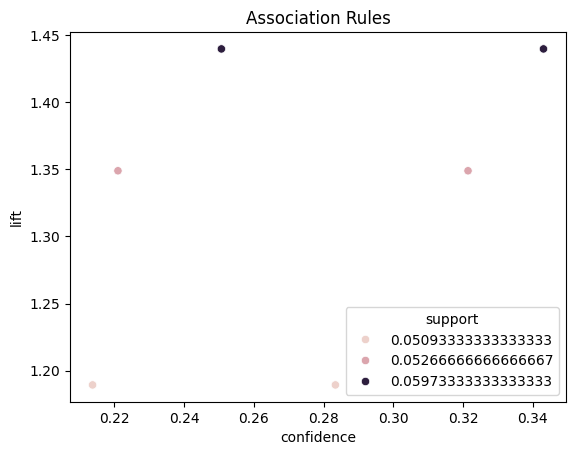

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of confidence vs lift
sns.scatterplot(data=rules, x="confidence", y="lift", hue="support")
plt.title("Association Rules")
plt.show()
